# Predicting Google Stock Prices using RNN

### Data Preprocessing

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing training set

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = df_train.iloc[:,1:2].values

Feature scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_set = sc.fit_transform(train_set)

Creating a datastructure with 60 timesteps and 1 output

In [4]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(train_set[i-60:i,0])
    y_train.append(train_set[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [5]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Bulding RNN
Importing libraries

In [6]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout

Using TensorFlow backend.


Inititalising and the adding 4 LSTM layers

In [7]:
reg = Sequential()

In [8]:
reg.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Adding the output layer

In [9]:
reg.add(Dense(units=1))

Compiling and the fitting RNN to the training set

In [10]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [11]:
reg.fit(x_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0476
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0037
Epoch 12/100
1198/1198 [

### Making Predictions and visualising the results
Getting real stock price

In [12]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_price = df_test.iloc[:,1:2].values

In [13]:
# df_test.Open

Getting the predicted stock prices

In [14]:
df_total = pd.concat((df_train.Open, df_test.Open), axis = 0)
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price = reg.predict(x_test)
pred_price = sc.inverse_transform(pred_price)

Visualising the results

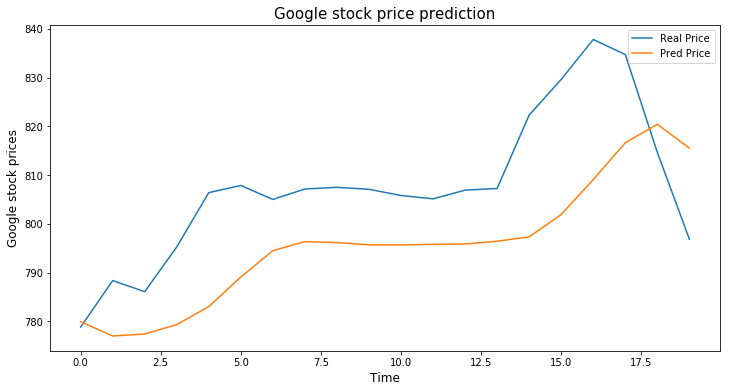

In [15]:
plt.figure(figsize=(12,6))
plt.plot(real_price, label = 'Real Price')
plt.plot(pred_price, label = 'Pred Price')
plt.xlabel('Time', size=12)
plt.ylabel('Google stock prices', size=12)
plt.title('Google stock price prediction',size=15)
plt.legend()

Evaluating the RNN

In [16]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price,pred_price))
rmse

16.12328598495648